<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/hw7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ZiyueNie/19ma573ZiyueNie

fatal: destination path '19ma573ZiyueNie' already exists and is not an empty directory.


In [2]:
cd 19ma573ZiyueNie/src/

/content/19ma573ZiyueNie/src


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as so
from contract_v01 import VanillaOption
from sde_1d_v01 import *

In [0]:
def bsm_option_payoff_generators(num_step,num_paths):
  gbm=Gbm_1d(init_state = 100., drift_ratio = .0475, vol_ratio = .2)
  stock=[]
  stock_payoff=[]
  European_call_payoff=[]
  Geometric_Asian_call_payoff=[]
  Arithmetric_Asian_call_payoff=[]
  for i in range(num_paths):
    w,t=BM_gen(0.,1,num_step)
    stock.append(gbm.S_price(w,t))
  for s in stock:
    stock_payoff.append(s[-1]-100)
    vani_option=VanillaOption(1,110,1,10)
    European_call_payoff.append(vani_option.payoff(s[-1]))
    Geo_Asian_price=1
    Arith_Asian_price=0
    for i in s:
      Geo_Asian_price=Geo_Asian_price*(i**(1/(num_step+1)))
      Arith_Asian_price=Arith_Asian_price+i/(num_step+1)
    Geometric_Asian_call_payoff.append(max(Geo_Asian_price-100,0))
    Arithmetric_Asian_call_payoff.append(max(Arith_Asian_price-100,0))
    
  return stock_payoff, European_call_payoff, Geometric_Asian_call_payoff,Arithmetric_Asian_call_payoff

In [0]:
stk,ec,gac,aac=bsm_option_payoff_generators(4,100)


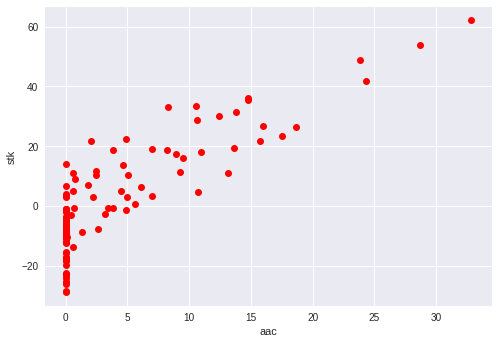

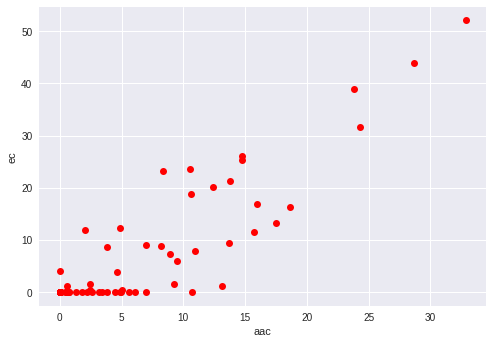

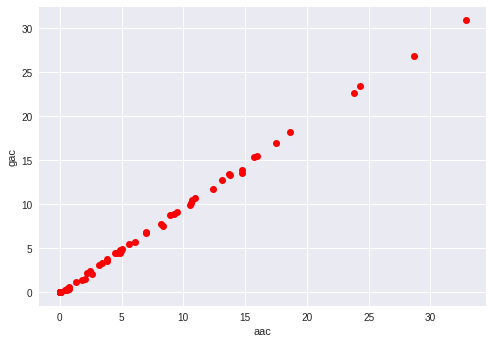

In [6]:
plt.plot(aac,stk,'ro')
plt.xlabel('aac')
plt.ylabel('stk')
plt.show()
plt.plot(aac,ec,'ro')
plt.xlabel('aac')
plt.ylabel('ec')
plt.show()
plt.plot(aac,gac,'ro')
plt.xlabel('aac')
plt.ylabel('gac')
plt.show()

gac is highly correlated to aac